## vgg16 finetuneing


In [ ]:
import os
import shutil

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']="/content"

In [ ]:
!kaggle datasets download -d amanullahasraf/covid19-pneumonia-normal-chest-xraypa-dataset

100% 1.33G/1.34G [00:43<00:00, 27.4MB/s]
100% 1.34G/1.34G [00:44<00:00, 32.4MB/s]


In [ ]:
from zipfile import ZipFile
fname='/content/covid19-pneumonia-normal-chest-xraypa-dataset.zip'
with ZipFile(fname,'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
# os.mkdir('Dataset')
# shutil.move('covid','Dataset')
# shutil.move('normal','Dataset')
# shutil.move('pneumonia','Dataset')

In [ ]:
os.chdir('Dataset')
os.rename('covid','0')
os.rename('normal','1')
os.rename('pneumonia','2')

os.chdir('../')

In [ ]:
# os.chdir('../')

In [ ]:
import random
os.chdir('Dataset')
if os.path.isdir('train/0/') is False:
  os.mkdir('train')
  os.mkdir('test')
  os.mkdir('valid')

  for i in range(0,3):
    shutil.move(f'{i}','train')
    os.mkdir(f'test/{i}')
    os.mkdir(f'valid/{i}')


    test_samples=random.sample(os.listdir(f'train/{i}'),100)
    for j in test_samples:
      shutil.move(f'train/{i}/{j}',f'test/{i}')

    valid_samples=random.sample(os.listdir(f'train/{i}'),200)
    for j in valid_samples:
      shutil.move(f'train/{i}/{j}',f'valid/{i}') 

os.chdir("../")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [ ]:
train_datagen=image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    width_shift_range=.1,
    height_shift_range=.1,
    zoom_range=.2,
    shear_range=.2,
    horizontal_flip=True
                                       )

test_datagen=image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
                                       )
valid_datagen=image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
                                       )

In [ ]:
train_path='Dataset/train'
test_path='Dataset/test'
valid_path='Dataset/valid'

In [ ]:
train_gen=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    color_mode='rgb'
)

test_gen=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=32,
    color_mode='rgb'
)

valid_gen=valid_datagen.flow_from_directory(
    valid_path,
    target_size=(224,224),
    batch_size=32,
    color_mode='rgb'
)

Found 3675 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [ ]:
vgg16_model=tf.keras.applications.vgg16.VGG16(include_top=False,weights='imagenet',input_tensor=Input(shape=(224,224,3)))

In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
 model=Sequential()
 for layer in vgg16_model.layers:
   model.add(layer)

In [ ]:
for layer in model.layers:
  layer.trainable=False

In [ ]:
# model.add(AveragePooling2D(pool_size=(4,4))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_gen,validation_data=valid_gen,epochs=20,batch_size=128,shuffle=True,verbose=2)

Epoch 1/20
115/115 - 96s - loss: 1.8129 - accuracy: 0.7679 - val_loss: 0.3829 - val_accuracy: 0.8583
Epoch 2/20
115/115 - 92s - loss: 0.5260 - accuracy: 0.8082 - val_loss: 0.2556 - val_accuracy: 0.9050
Epoch 3/20
115/115 - 92s - loss: 0.4870 - accuracy: 0.8324 - val_loss: 0.2318 - val_accuracy: 0.9150
Epoch 4/20
115/115 - 90s - loss: 0.4597 - accuracy: 0.8239 - val_loss: 0.2357 - val_accuracy: 0.9200
Epoch 5/20
115/115 - 92s - loss: 0.4274 - accuracy: 0.8661 - val_loss: 0.1915 - val_accuracy: 0.9367
Epoch 6/20
115/115 - 93s - loss: 0.4064 - accuracy: 0.8612 - val_loss: 0.2380 - val_accuracy: 0.9083
Epoch 7/20
115/115 - 92s - loss: 0.3722 - accuracy: 0.8669 - val_loss: 0.2384 - val_accuracy: 0.9233
Epoch 8/20
115/115 - 92s - loss: 0.3878 - accuracy: 0.8659 - val_loss: 0.2078 - val_accuracy: 0.9233
Epoch 9/20
115/115 - 92s - loss: 0.3737 - accuracy: 0.8729 - val_loss: 0.1907 - val_accuracy: 0.9300
Epoch 10/20
115/115 - 90s - loss: 0.3745 - accuracy: 0.8688 - val_loss: 0.2006 - val_accura

In [ ]:
predictions=model.predict(test_gen)

In [ ]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes,rotation=0)

  if normalize:
    cm=cm.astype('float')/am.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix,without normalization")
  
  print(cm)

  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
cm=confusion_matrix(y_true=test_gen.classes,y_pred=np.argmax(predictions,axis=-1))

Confusion matrix,without normalization
[[27 40 33]
 [25 39 36]
 [34 49 17]]


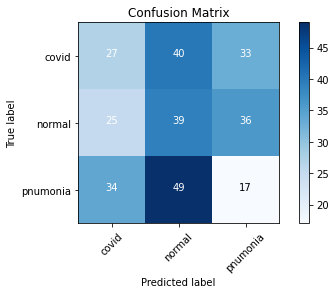

In [ ]:
cm_plot_labels=['covid','normal','pnumonia']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')